In [1]:
# Import libraries necessary for project
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
#Calculate the Statistics

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard Deviation of price of the data
std_price = np.std(prices)

#Show the calculated values
print "Statistics for Boston housing dataset:\n"
print "Minimum Price: ${:,.2f}".format(minimum_price)
print "Maximum Price: ${:,.2f}".format(maximum_price)
print "Mean Price: ${:,.2f}".format(mean_price)
print "Median Price: ${:,.2f}".format(median_price)
print "Standard Deviation of Prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum Price: $105,000.00
Maximum Price: $1,024,800.00
Mean Price: $454,342.94
Median Price: $438,900.00
Standard Deviation of Prices: $165,171.13


In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    #Return the Score
    return score

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has coefficient of determination, R^2, of {:.3f}.".format(score)

Model has coefficient of determination, R^2, of 0.923.


In [6]:
#Implementation:Shuffle and Split Data
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state = 33)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


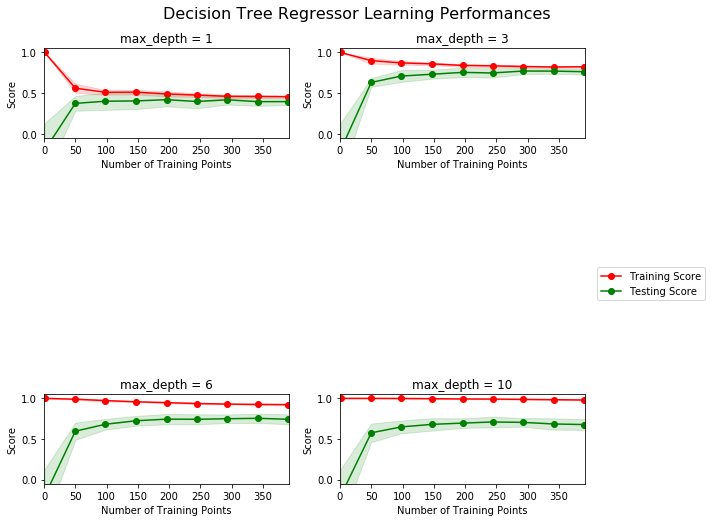

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

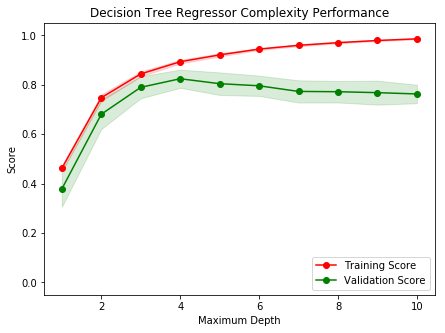

In [9]:
#Complexity Curve
vs.ModelComplexity(X_train, y_train)

In [10]:
#Construct a model and make a prediction

'''
The k-fold cross-validation training technique is the process of dividing your data points into 
smaller number of k bins. Testing then occurs on one of the k bins while training occurs with 
the other k-1 bins. This process, testing and training, occurs k times across all bins for 
testing and training. The average of the k testing experiments are used as the overall result of the model.
'''

#Your final implementation requires that you bring everything together and train a model using the decision 
#tree algorithm.


'\nThe k-fold cross-validation training technique is the process of dividing your data points into \nsmaller number of k bins. Testing then occurs on one of the k bins while training occurs with \nthe other k-1 bins. This process, testing and training, occurs k times across all bins for \ntesting and training. The average of the k testing experiments are used as the overall result of the model.\n'

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    #Create cross validation sets from training data from training set
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1, 11)} # last value in range is exclusive
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for optimal model".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for optimal model


In [14]:
# Produce a matrix for client data
client_data = [[5, 17, 15],
               [4, 32, 22],
               [8, 3, 12]]
#Show prediction
for i,price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for client 1's home: $409,400.00
Predicted selling price for client 2's home: $229,682.35
Predicted selling price for client 3's home: $938,053.85


In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
